# STAT 301 Assignment 3: Methods and Plans

By William Cheng

## Table of Contents
1. [Summary of the Dataset](#summary)
2. [Question](#question)
3. [Data Wrangling and Cleaning](#wrangling)
4. [Data Visualization](#visualization)
5. [Discussion from Visualization](#discussion)
6. [Methods and Plans](#method)

In [1]:
# Run this cell to import libraries
library(tidyverse)
library(repr)
library(infer)
library(broom)
library(cowplot)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Importing Census Dataset from the Internet

In [2]:
# Load data with correct columns
census_data <- read_csv("https://github.com/whalebeavercat/STAT-301-Census-Project/blob/main/data/adult.data?raw=TRUE", col_names = FALSE, show_col_types = FALSE)
col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income")
colnames(census_data) <- col_names

In [3]:
# Display data set as well as the number of rows and columns
head(census_data)
nrow(census_data)
ncol(census_data)

age workclass        fnlwgt education education-num marital-status    
1 39  State-gov         77516 Bachelors 13            Never-married     
2 50  Self-emp-not-inc  83311 Bachelors 13            Married-civ-spouse
3 38  Private          215646 HS-grad    9            Divorced          
4 53  Private          234721 11th       7            Married-civ-spouse
5 28  Private          338409 Bachelors 13            Married-civ-spouse
6 37  Private          284582 Masters   14            Married-civ-spouse
  occupation        relationship  race  sex    capital-gain capital-loss
1 Adm-clerical      Not-in-family White Male   2174         0           
2 Exec-managerial   Husband       White Male      0         0           
3 Handlers-cleaners Not-in-family White Male      0         0           
4 Handlers-cleaners Husband       Black Male      0         0           
5 Prof-specialty    Wife          Black Female    0         0           
6 Exec-managerial   Wife          White Female    0         0           
  hours-per-week native-country income
1 40             United-States  <=50K 
2 13             United-States  <=50K 
3 40             United-States  <=50K 
4 40             United-States  <=50K 
5 40             Cuba           <=50K 
6 40             United-States  <=50K

[1] 32561

[1] 15

`Table 1`: Initial Dataset

## Summary of the Dataset  <a name="summary"></a>

There are 32561 rows and 15 variables. The dataset was originally used to determine the target response variable, `income` from 14 features. Each rows contains the characteristic for `fnlwgt` number of individuals. Only individuals whose `age` > 16 were considered. The rows with columns containing the value "?" will be pruned in data cleaning. The following variables are as followed:
- `age`: numeric variable, the age of a person in years. Only individuals with `age` > 16 were considered.
- `workclass`: categorical variable, type chr, represents the type of employement, such as Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: numeric variable, represent the final weight, meaning the number of people the census believes are represented by all the features in the row
- `education`: categorical variable, type chr, represents the highest education level obtained, such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: numeric variable, the highest education level obtained in numeric form
- `marital-status`: categorical variable, type chr, represents the marital status for both civilian and Armed Forces marriages, such as Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: categorical variable, type chr, represents the type of occupation the person has, such Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: categorical variable, type chr, represents the relations the person has to others, similar to `maritial-status`, such as Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: categorical variable, type chr, represents the race of the individual, such as White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: categorical variable, type chr, represents the biological sex, such as Female, Male.
- `capital-gain`: numeric variable, the capital gain for the individual or profit made by selling assets.
- `capital-loss`: numeric variable, the capital loss for the individual or loss from selling assets.
- `hours-per-week`: numeric variable, the number of hours per week the individual works.
- `native-country`: categorical variable, the country where the individual is born, such as United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `income`: categorical variable, type logical, whether the individual makes <=50K or > 50K

### Where Does the Dataset come from

The dataset comes from the UC Irvine Machine Learning Repository (https://doi.org/10.24432/C5XW20). It was collected from a US Census Bureau database in 1994 and extracted by Berry Becker. The intention was to predict whether a person makes <= 50K or > 50K from the given features.

The population of interest for the Census is the total population for all 50 state governments and 90299 local governments. Data was collected as a survey in the form of mail and internet, such that all US individuals should receive it. The Census data is then extracted to include adults only and income is masked to either <= 50K or > 50K. 

## Question <a name="question"></a>
The question posed for this assignment is: 
Are `income` of <= 50K and > 50K, `race`, `workclass`, and `sex` associated with the level of education of all American individuals?

Given that the `education-num` is a useful numeric indicator of education level, we could perform an additive/interaction multiple linear regression with the categorical/logical variables `income`, `workclass`, `sex`, and `race` and determine if the mean level of education are different. Then, we can determine if the mean level of education is statistically significant than the `income`.

We could create a response variable: $Y$ representing the mean education-num.

Then, we could create variables, $X_{female}$, $X_{>50K}$, $X_{race}$ for 4 races, and $X_{workclass}$ for 6 work classes other than the reference. We set one value as a reference, so all $X$ is either 0 or 1.

This is an inferential question, such that the hypothesis tests below are described as:

$H_0: \beta_i = 0$

$H_A: \beta_i \neq 0$

For $\beta$ of all variables $X$ and $\beta_0$ representing the intercept or the mean education-num of the reference level.


Since we are dealing with the census, which is a big sample and similar to the population, we should take random samples from it. This is to preserve computational resources because the dataset contains high volume. As well, we can calculate use statistical inference such as confidence intervals and hypothesis tests to make inferences of the population.

Compared to Assignment 1, we will be adding a variable `workclass` to work with more variables.

## Data Wrangling and Cleaning <a name="wrangling"></a>

Many data values contain the value "?", which means that it is incomplete row. We need to remove all rows containing that value. This will result in 30162 total examples.

As well, it is neccessary to adapt `chr` values to `logical`, such as income, to clean data. We can also remove the `education` variable because it is represent by `education-num`.

Ideally, since each row represents a certain characteristic of an American, we need to create a row for every person from the `fnlwgt`. However, this would generate 6179373392 rows which will lead to high computational costs. As well, these values are estimates so they will negatively affect our investigation. This variable will thus be removed and we will assume that all rows/characteristics in the dataset have the same weight and are represented equally in population.

Other categorical variables like `relationship` and `marital-status` provide no added value to answering the question, so they will be removed as well. `native-country` and `occupation` may have some correlations with `race` and `workclass`, so they will be kept for further investigations.

In [8]:
census_data_clean <- census_data |> 
    filter_all(all_vars(. != "?")) |>
    mutate(income_50K = income == ">50K") |>
    select(-income, -education, -fnlwgt, -relationship, -`marital-status`)
head(census_data_clean)
nrow(census_data_clean)

# Total Sum of Weights
total_weight <- sum(census_data$fnlwgt)
total_weight

age workclass        education-num occupation        race  sex   
1 39  State-gov        13            Adm-clerical      White Male  
2 50  Self-emp-not-inc 13            Exec-managerial   White Male  
3 38  Private           9            Handlers-cleaners White Male  
4 53  Private           7            Handlers-cleaners Black Male  
5 28  Private          13            Prof-specialty    Black Female
6 37  Private          14            Exec-managerial   White Female
  capital-gain capital-loss hours-per-week native-country income_50K
1 2174         0            40             United-States  FALSE     
2    0         0            13             United-States  FALSE     
3    0         0            40             United-States  FALSE     
4    0         0            40             United-States  FALSE     
5    0         0            40             Cuba           FALSE     
6    0         0            40             United-States  FALSE

[1] 30162

[1] 6179373392

`Table 2`: Wrangled and Cleaned Dataset

Given that the census is a large sample of a population, it is necessary to take a smaller random sample to perform statistical inference and estimate the population parameters. This analysis will take 1000 random examples without replacement. The size is chosen since it is small enough to avoid introducing biases to our sample.

In [9]:
set.seed(2024)

# Create a Random Sample of size 1000
census_sample <- sample_n(census_data_clean, size = 1000, replace = FALSE)
head(census_sample)

age workclass        education-num occupation        race  sex   
1 35  Self-emp-not-inc  9            Sales             White Male  
2 23  Private          10            Other-service     White Female
3 39  Private          13            Exec-managerial   White Female
4 20  Private          10            Adm-clerical      Black Female
5 26  Private           9            Craft-repair      White Male  
6 36  Private          11            Machine-op-inspct White Male  
  capital-gain capital-loss hours-per-week native-country income_50K
1    0         0            50             United-States   TRUE     
2    0         0            15             United-States  FALSE     
3    0         0            35             United-States  FALSE     
4    0         0            40             Haiti          FALSE     
5    0         0            72             Mexico         FALSE     
6 3103         0            40             United-States   TRUE

`Table 3`: Random Sample of size 1000

## Data Visualization <a name="visualization"></a>

First, let us create a combined box plots of all relevant categorical variable that could be made with our response variable `education-num`. The relevant categorical variables are `race`, `sex`, `income_50K`, and `workclass`. These graph allow us to visualize the differences in expected education level between categories within and between variables.

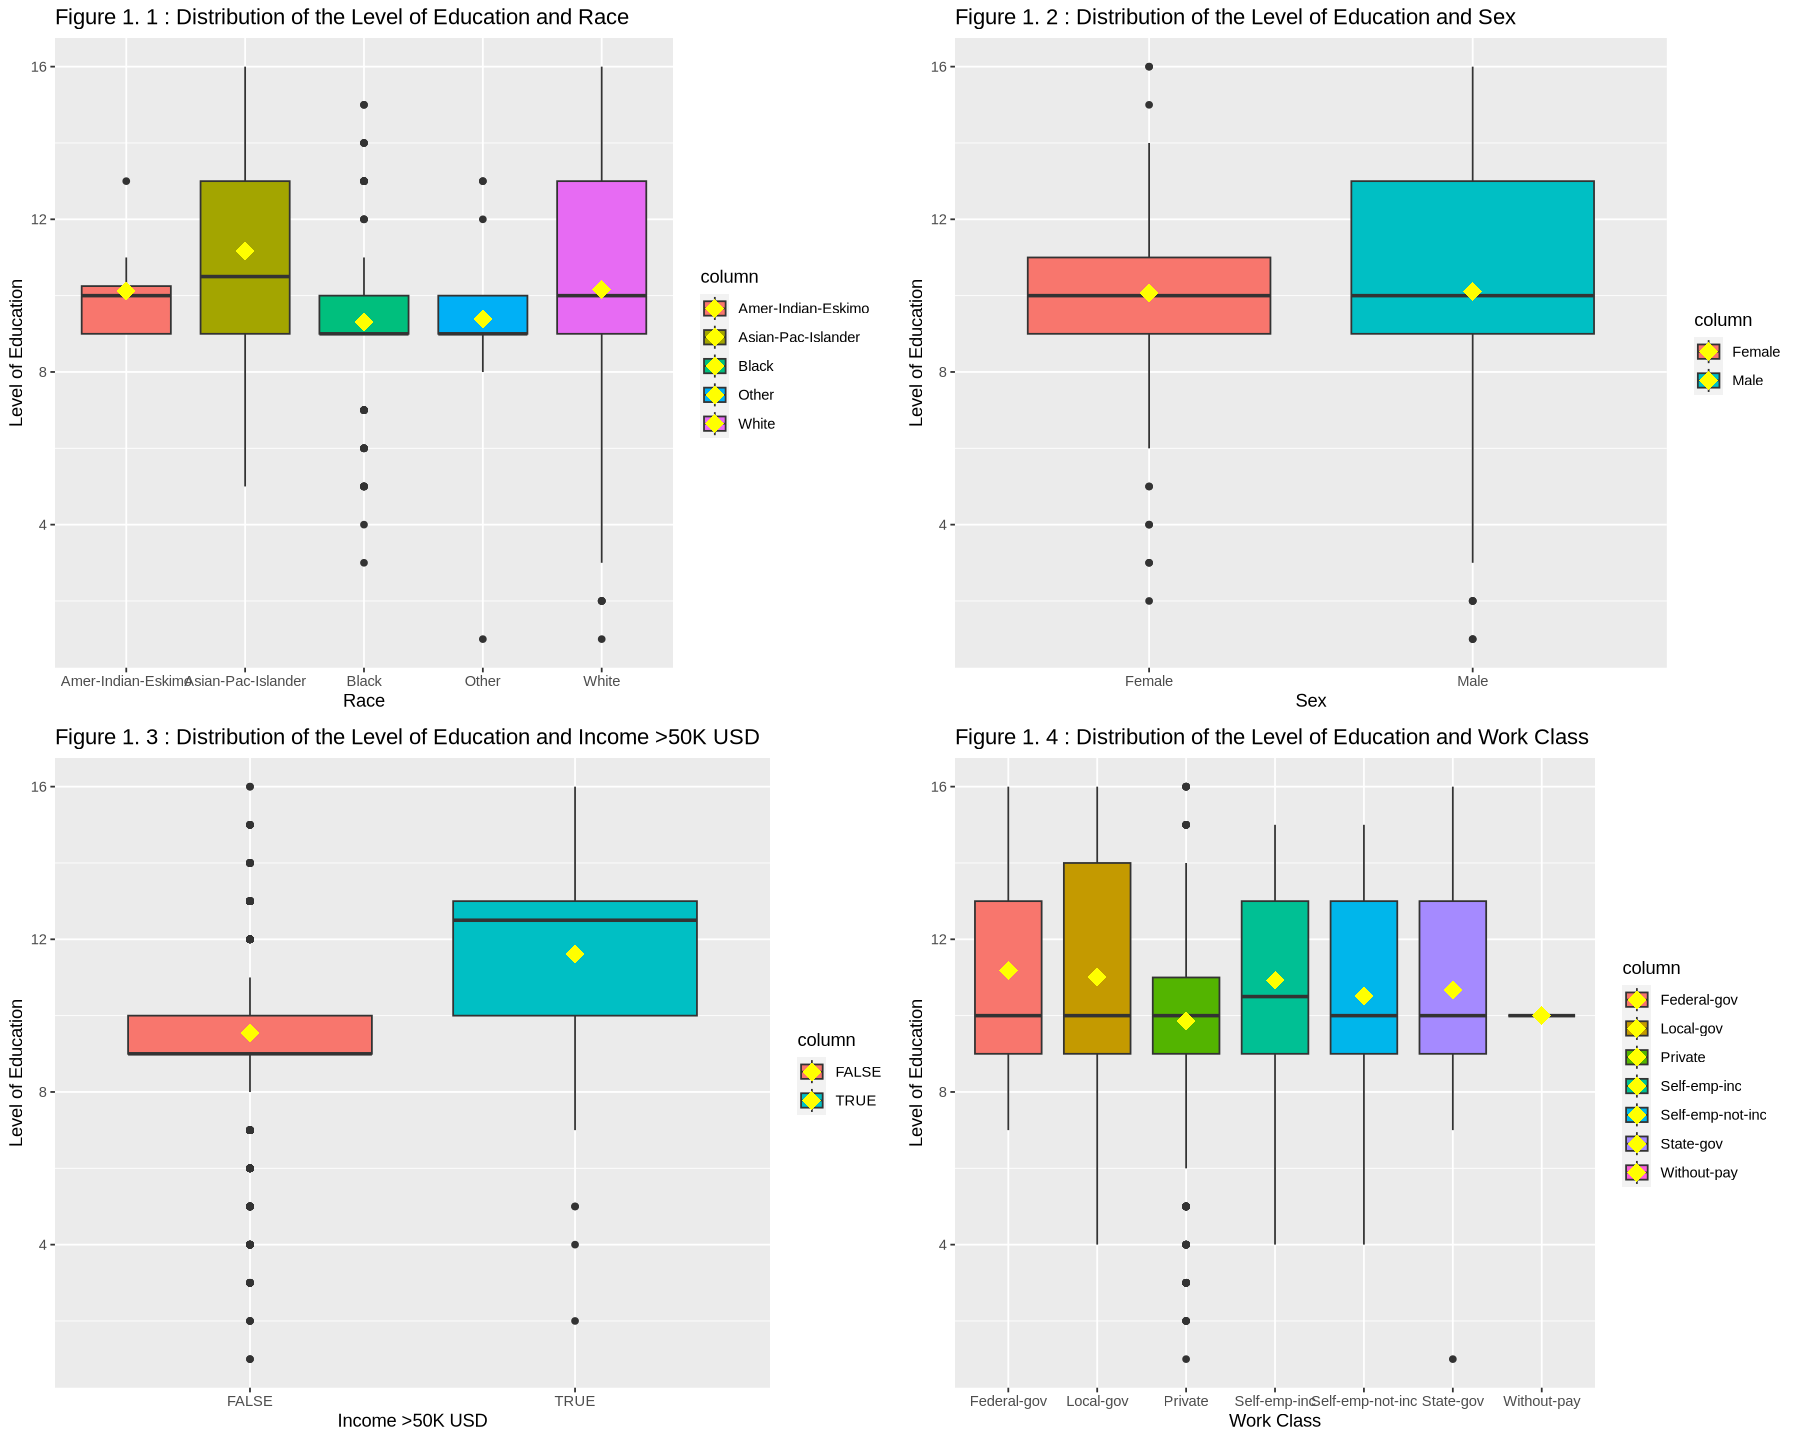

In [10]:
options(repr.plot.width = 15, repr.plot.height = 12)

# Function used to create boxplots the plots share the same response variable education num
create_education_boxplot <- function(column, column_name, number) {
    boxplot <- census_sample |>
        ggplot() +
        geom_boxplot(aes(x = column, y = `education-num`, fill = column)) +
        labs(x = column_name, y = "Level of Education", title = paste("Figure 1.", number, ": Distribution of the Level of Education and", column_name)) +
        stat_summary(aes(x = column, y = `education-num`, fill = column),
            fun = mean, colour = "yellow", geom = "point", 
            shape = 18, size = 5
        )
    return(boxplot)
}

# Boxplot visualization for the distribution of race and education level
race_boxplot <- create_education_boxplot(census_sample$race, "Race", "1")

# Boxplot visualization for the distribution of race and education level
sex_boxplot <- create_education_boxplot(census_sample$sex, "Sex", "2")

# Boxplot visualization for the distribution of income and education level
income_boxplot <- create_education_boxplot(census_sample$income_50K, "Income >50K USD", "3")

# Boxplot visualization for the distribution of work class and education level
workclass_boxplot <- create_education_boxplot(census_sample$workclass, "Work Class", "4")

plot_grid(race_boxplot, sex_boxplot, income_boxplot, workclass_boxplot)

`Figure 1`: The combination box plots for Level of Education and Race, Sex, Income, and WorkClass

## Discussions from the visualization <a name="discussion"></a>

The boxplots listed above `Figure 1` show the initial comparison within the categories for `race`, `sex`, `income`, and `workclass`, which are all explanatory variables for the question. The boxplots provide us with the overall distribution of education level and the explanatory variables including the quartiles, means, medians, and outliers. The variability of each group is indicated clearly by the boxes and helps with visualizing the differences. An initial guess could be made whether the levels have different expected levels of education. 

Since all graphs share the same scale for `education-num`, it could be used to compare categories between variables too. For example, we could see that the median of education num for Income > 50K is greater than that of Without-pay in `workclass`.

For `Figure 1.1`, all categories have differing variability and quantiles, but median values are quite similiar throughout. Asian-Pac-Islander has a similiar median to White but has a greater mean. Black and Amer-Indian-Eskimo have smaller variability compared to the other categories.
For `Figure 1.2`, female and male seem to share similar mean and median education levels. The variability for male seems to be larger than that of female.
For `Figure 1.3`, the >50K level has a greater median and mean education level than that of the <= 50 level. The >50K level has greater variability.
For `Figure 1.4`, 5 of the categories share similar variability of education level as well as similar median/different mean. Private and Without-pay have smaller variability. Local-gov has the highest median and mean while Without-pay has the lowest median and mean. Without-pay's upper quartile is less than the lower quartile of the other categories.

Potential problems may arise from muliticolinearity or the existence of a confounding variable. It is difficult to determine if input variables are correlated from a graph and requires additional context or variance inflation factor calculations. It is also challenging to determine confounding variables too without looking at other possible variables.

Then, let us perform a visualization on all numerical variables to determine if there is a correlation between an explanatory variable with another explanatory variable or the response variable `education-num`. Although, these variables are not used in the question, they provide key information to determine if there are any confounding variables or multicollinearity. For example, if a numerical variable and the response variable are heavily correlated, it would be wise to investigate the relationship between said numerical variable and the relevant variables. Then, the model will be adjusted accordingly for the best estimates.

In addition, the pair plot is useful in providing context, allowing us to understand the relationship between variables. They provide scatterplots, distribution graphs, and correlation coefficients. These factors are important to determine what is included in the models, such as whether it is reasonable to use interaction terms for  linear regression.

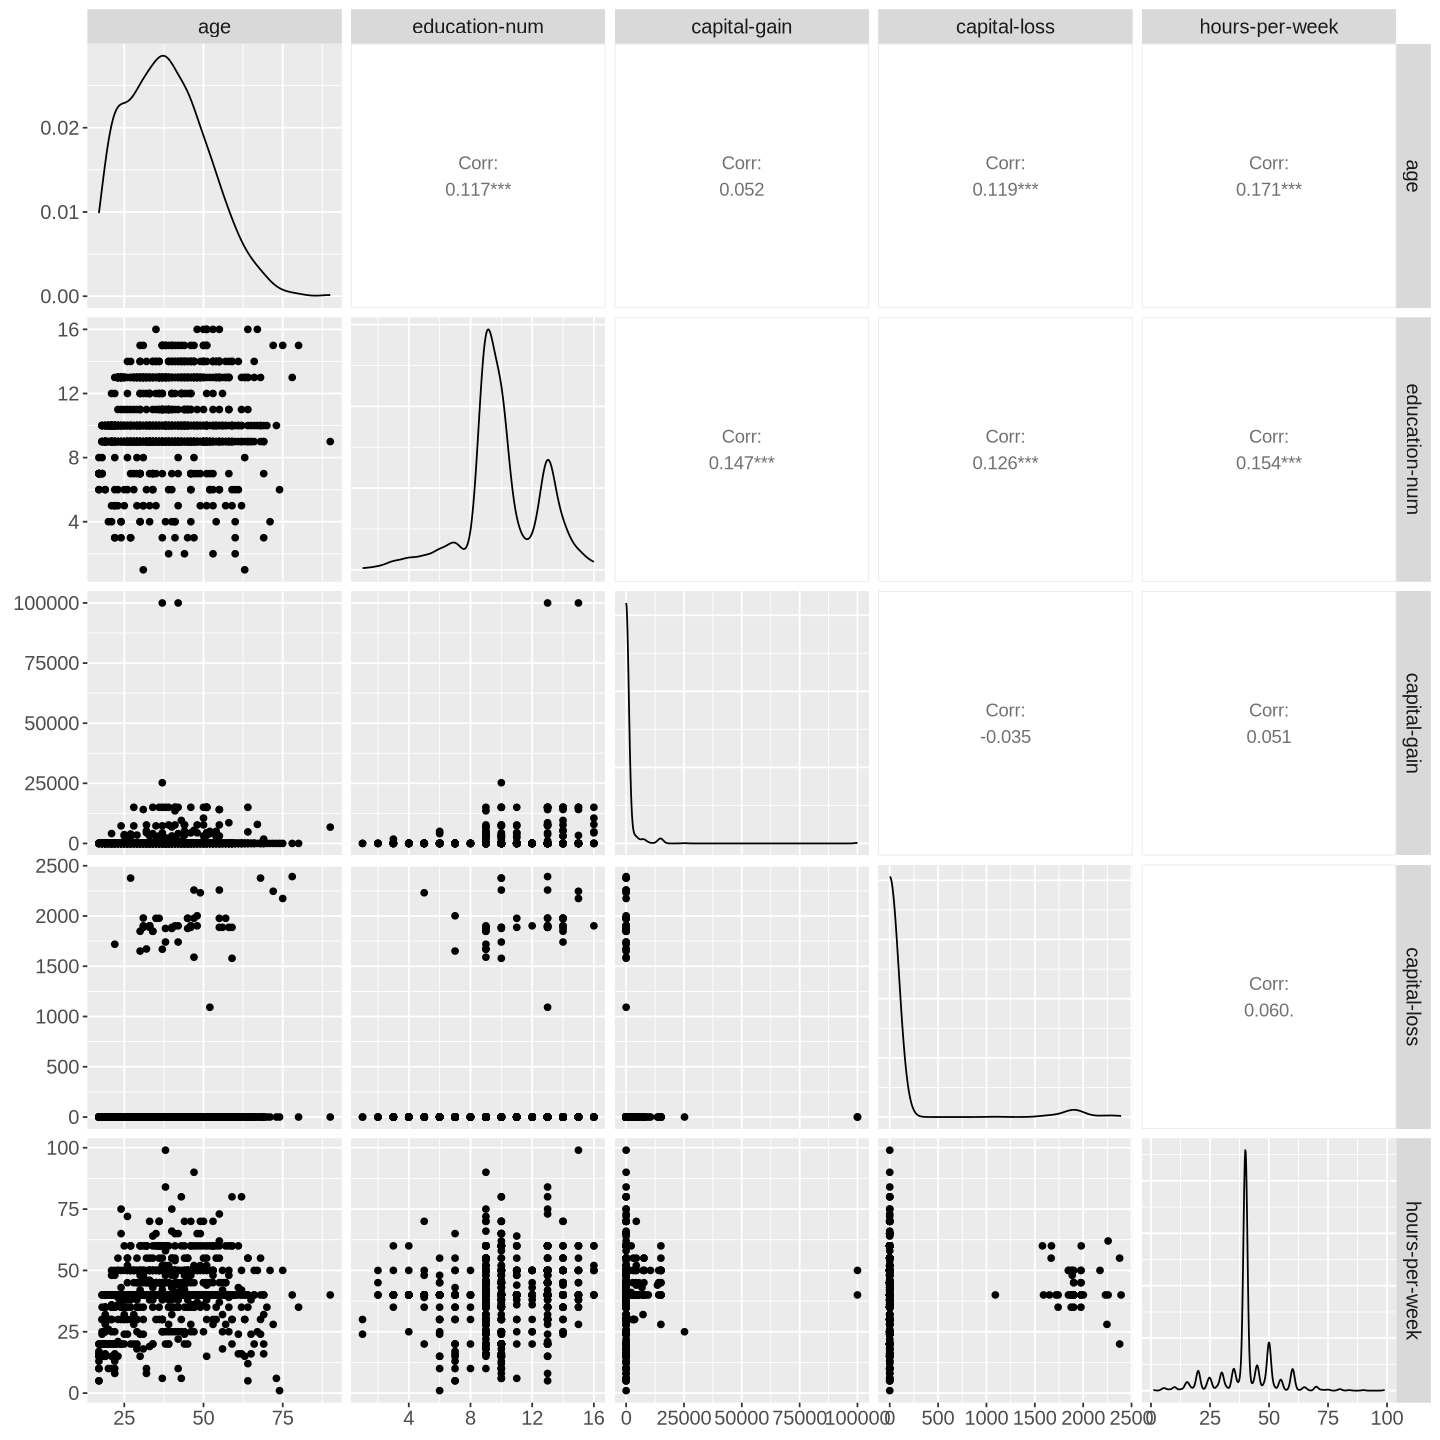

In [11]:
options(repr.plot.width = 12, repr.plot.height = 12)

census_numerical <- census_sample |>
    select(age, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`)

# Using ggpairs, create a pair plot for all numerical variables to determine if there are correlations between variables
combo_plot <- census_numerical |>
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

combo_plot

`Figure 2`: Pairs plot between numerical variables and distribution of variables

From the visualization and correlation coefficients between the numerical variables, none of them seem to be linearly correlated to another. The highest correlation is between capital gain and education-num at 0.171, but this is relatively small. As such, it is unlikely that our relevant variable will be masked by another.

As well, the combo plot provides the distribution of each variables. For example, `education-num` is bimodel, with 2 peaks around 9 and 13. `age` is rightly skewed with a peak at around 30 years old. `capital-gain` and `capital-loss` are heavily skewed with a peak at around 0. `hours-per-week` has a large peak around the 40 hr mark.

## Methods and Plans <a name="method"></a>

### Method Proposal

Since the question investigates if the education level is associated with `race`, `sex`, `income` > 50K, and `workclass`, an additive MLR is appropriate for statistical inference and hypothesis testing. Using the hypothesis tests defined in the [Question](#question)'s section, we could determine if the population's education level is associated with each explanatory variable. The expected difference in education level between the baseline category and other significant categories could be calculated. For example, we could determine if the expected education level between males and females (`sex`) is statistically different. We could also use interaction terms to explore the influence between explanatory variables.

To compare the MLR models, it is necessary to test if a MLR with interaction terms is significantly different than without, as well as comparing it with the null model. The null hypothesis $H_0$ is that all additional coefficients from the interaction term are equal to 0. The alternative hypothesis $H_A$ is that at least one additional coefficient is not equal to 0. ANOVA will be used to compare the models and perform F-tests. With a significance level of $\sigma = 0.05$, we can determine whether we should reject the null hypothesis and choose the best model accordingly.

After choosing the most significant model for the `education-num` and calculating the p-values, statistically significant explanatory variables are chosen with significance level $\alpha = 0.05$. The coefficient $\beta$ for those variables explains the expected difference in education level between the associated category and the baseline. The intercept represents the mean education level of the sample. The standard error and 95% confidence interval could be calculated. This denotes that we are 95% confident that the interval contains the difference in education level for all American individuals of that variable. $R^2$ indicates the variation of the response that is explained by the model.

### Assumptions

The general assumptions for an additive MLR apply here. For additive models, the explanatory variables will have a common slope and different intercepts for each level. As well, we will assume that the response variable is linearly correlated with the explanatory variables. Other necessary assumptions include that all errors are independent, the conditional distribution of the errors is normal, and there is equal variance with no heteroscedasticity. Multicollinearity will be addressed with VIF calculations and one or the other of the correlated variables will be removed accordingly. Otherwise, information from variables will be masked by another and the standard error of estimators will be large.

Other assumptions, such as for `fnlwgt` and `education-num`, are described in the EDA section.

### Limitations and Weaknesses

Ideally, some explanatory variables being numeric would be better. For example, `age` would be an interesting factor to introduce. Additionally, assuming that there is a linear relationships between the response and explanatory variables, even though it is not, would decrease the model's accuracy. Other assumptions listed above may not apply to the model, reducing the accuracy.

One limitation of the method is that `education-num` is not the greatest numerical response variable because it contains whole numbers from 1 to 16. It represents the number of years of education. For example, a Bachelor is assigned 13 while a High School Graduate is assigned 9. The 4 year difference represents the number of years to complete a Bachelor. As we are investigating the difference between expected education level/years, using real numbers would make sense.

Specifically for the dataset, the distribution for the category is different. For example, there are disproportionately more males than females as well as errors.

Confounding variables that are not included in the model could affect it negatively.

## References

Becker, Barry and Kohavi, Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Bureau, U. C. (2023, May 17). How the data are collected. Census.gov. https://www.census.gov/programs-surveys/gov-finances/technical-documentation/methodology/how-the-data-are-collected.html#:~:text=Methods%3A%20The%20data%20collection%20for,state%20and%20type%20of%20government 